In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# data
result_after = pd.read_csv('result.csv')
result_before = pd.read_csv('result_before_remove_equals.csv')
compare_after = pd.read_csv('compare.csv')
compare_before = pd.read_csv('compare_before_remove_equals.csv')

# Pre analysis

In [18]:
# columns name
print("results: " + ", ".join(result_after.columns.tolist()))
print("compare: " + ", ".join(compare_after.columns.tolist()))

results: projectname, version, domain, #LOC, #AA, %disciplined, %IF, %CA, %EI, %PA, %EX, %NC, total disciplined
compare: projectname, diff loc, diff blocks, diff % disciplined, diff disciplined


In [20]:
# show results
print(result_after)

    projectname   version                  domain    #LOC   #AA  %disciplined  \
0        apache    2.2.11              Web server   35873   350         82.00   
1        apache    2.4.46              Web server   78287   387         86.30   
2   berkeley.db      18.1              Web server  252018  3823         92.68   
3   berkeley.db    4.7.25              Web server  178003  3077         92.46   
4      cherokee   0.99.11         database system    4383    19         89.47   
..          ...       ...                     ...     ...   ...           ...   
61         xfig    3.2.8a  vector graphics editor    1063    16         87.50   
62      xinelib    1.1.16           media library     940     3        100.00   
63      xinelib  1.1.20.1           media library    1788     3         33.33   
64        xterm     2.4.3       terminal emulator    1729    99         94.95   
65        xterm    3.1.7c       terminal emulator    7780    70        100.00   

     %IF  %CA  %EI   %PA   

In [21]:
# show compare
print(compare_after)

    projectname  diff loc  diff blocks  diff % disciplined  diff disciplined
0        apache     42414           37                4.30                46
1   berkeley.db     74015          746                0.22               697
2      cherokee      1543           18               10.53                21
3        clamav    149347         1202                1.87              1092
4       cpython     47913         -607               -1.58              -650
5           dia      3589           34                4.35                37
6         emacs     33914         2261               -0.84              2113
7       freebsd   5969007        50749                0.42             46820
8           gcc   1472906         5849                2.61              5296
9   ghostscript    688060         4049               -1.68              3579
10         gimp    127583           91               -1.66                83
11        glibc    122509         1372                3.46              1377

In [36]:
compare_before_after = pd.concat([compare_before['projectname'], compare_after['projectname'], \
                                 compare_before['diff % disciplined'], compare_after['diff % disciplined'],\
                                 compare_before['diff loc'], compare_after['diff loc'], \
                                 compare_before['diff blocks'], compare_after['diff blocks']], \
                                axis=1, \
                                keys = ['name before','name after',\
                                        'diff % disc before', 'diff % disc after',\
                                        'diff loc before', 'diff loc after', \
                                        'diff blocks before', 'diff blocs after'])
print(compare_before_after)

    name before   name after  diff % disc before  diff % disc after  \
0        apache       apache                1.42               4.30   
1   berkeley.db  berkeley.db                0.29               0.22   
2      cherokee     cherokee                1.08              10.53   
3        clamav       clamav                5.29               1.87   
4       cpython      cpython               -0.66              -1.58   
5           dia          dia               -0.83               4.35   
6         emacs        emacs               -1.81              -0.84   
7       freebsd      freebsd                0.08               0.42   
8           gcc          gcc                0.31               2.61   
9   ghostscript  ghostscript               -1.04              -1.68   
10         gimp         gimp                0.74              -1.66   
11        glibc        glibc                7.76               3.46   
12     gnumeric     gnumeric                6.67               7.85   
13    

<AxesSubplot:xlabel='name before'>

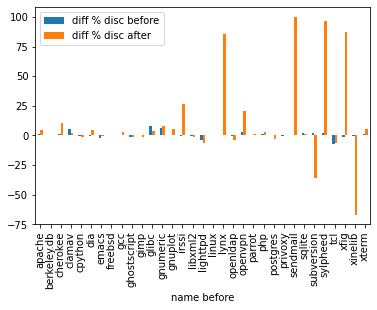

In [39]:
compare_before_after.plot(x='name before', y=['diff % disc before', 'diff % disc after'], kind='bar')